# Exploratory Data Analysis - Telco Churn

This notebook uses random telco customer churn data I found on GitHub

In [27]:
# import packages that will be used throughout the notebook
import pandas as pd
import numpy as np
import collections
import seaborn as sns
from matplotlib import pyplot as plt

**To see all columns and all row names**

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

**Import data**

In [28]:
# read the csv file in as a pandas dataframe
df = pd.read_csv("subset_merge_agg_0k_35_copy.csv")
display(df.head(n=100))

# show the shape of the data (Number of rows, number of columns)
print("Shape: " + str(df.shape))

,customer_id,churned,period_count,from_calls_Jan,from_duration_Jan,from_dropped_Jan,to_calls_Jan,to_duration_Jan,to_dropped_Jan,gender,age,type,location,callcenter_callcount,text_package_deal,voice_package_deal,4g_handset_deal,all_u_can_eat_data_deal,accidental_damage_cover_deal,europe_roamer_deal,americas_roamer_deal,asia_africa_roamer_deal,extra_handset_deal,musicsubscription_deal,period,from_calls_Feb,from_duration_Feb,from_dropped_Feb,to_calls_Feb,to_duration_Feb,to_dropped_Feb,from_calls_Mar,from_duration_Mar,from_dropped_Mar,to_calls_Mar,to_duration_Mar,to_dropped_Mar,from_calls_Apr,from_duration_Apr,from_dropped_Apr,to_calls_Apr,to_duration_Apr,to_dropped_Apr,from_calls_May,from_duration_May,from_dropped_May,to_calls_May,to_duration_May,to_dropped_May,from_calls_Jun,from_duration_Jun,from_dropped_Jun,to_calls_Jun,to_duration_Jun,to_dropped_Jun,from_calls_Jul,from_duration_Jul,from_dropped_Jul,to_calls_Jul,to_duration_Jul,to_dropped_Jul,from_calls_Aug,from_duration_Aug,from_dropped_Aug,to_calls_Aug,to_duration_Aug,to_dropped_Aug,from_calls_Sep,from_duration_Sep,from_dropped_Sep,to_calls_Sep,to_duration_Sep,to_dropped_Sep,from_calls_Oct,from_duration_Oct,from_dropped_Oct,to_calls_Oct,to_duration_Oct,to_dropped_Oct,from_calls_Nov,from_duration_Nov,from_dropped_Nov,to_calls_Nov,to_duration_Nov,to_dropped_Nov,from_calls_Dec,from_duration_Dec,from_dropped_Dec,to_calls_Dec,to_duration_Dec,to_dropped_Dec
0,C0000000584,0,10,NaN,NaN,NaN,NaN,NaN,NaN,gender,age,type,location,callcenter_callcount,text_package_deal,voice_package_deal,4g_handset_deal,all_u_can_eat_data_deal,accidental_damage_cover_deal,europe_roamer_deal,americas_roamer_deal,asia_africa_roamer_deal,extra_handset_deal,musicsubscription_deal,Jan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159.0,1559.0,7.0,31.0,321.0,4.0,160.0,1433.0,14.0,31.0,305.0,2.0,146.0,1420.0,11.0,19.0,209.0,2.0,172.0,1504.0,11.0,35.0,375.0,5.0,173.0,1681.0,9.0,41.0,433.0,1.0,158.0,1524.0,8.0,34.0,259.0,3.0,154.0,1472.0,5.0,40.0,384.0,5.0,141.0,1445.0,9.0,43.0,391.0,8.0,169.0,1480.0,5.0,31.0,247.0,2.0
1,C0000000019,0,12,85.0,705.0,2.0,46.0,425.0,8.0,gender,age,type,location,callcenter_callcount,text_package_deal,voice_package_deal,4g_handset_deal,all_u_can_eat_data_deal,accidental_damage_cover_deal,europe_roamer_deal,americas_roamer_deal,asia_africa_roamer_deal,extra_handset_deal,musicsubscription_deal,Jan,94.0,736.0,2.0,40.0,492.0,8.0,104.0,894.0,7.0,48.0,493.0,5.0,89.0,787.0,2.0,47.0,409.0,4.0,111.0,1068.0,7.0,52.0,517.0,4.0,113.0,1020.0,6.0,48.0,439.0,11.0,121.0,1112.0,3.0,55.0,466.0,9.0,89.0,791.0,2.0,52.0,502.0,12.0,109.0,918.0,5.0,39.0,377.0,5.0,102.0,934.0,4.0,47.0,435.0,10.0,91.0,855.0,4.0,48.0,381.0,3.0,95.0,896.0,5.0,41.0,384.0,2.0
2,C0000000192,1,4,NaN,NaN,NaN,NaN,NaN,NaN,gender,age,type,location,callcenter_callcount,text_package_deal,voice_package_deal,4g_handset_deal,all_u_can_eat_data_deal,accidental_damage_cover_deal,europe_roamer_deal,americas_roamer_deal,asia_africa_roamer_deal,extra_handset_deal,musicsubscription_deal,Jan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,238.0,2.0,21.0,187.0,2.0,17.0,145.0,1.0,28.0,256.0,3.0,15.0,190.0,0.0,31.0,276.0,2.0
3,C0000000929,0,12,13.0,142.0,3.0,83.0,719.0,7.0,gender,age,type,location,callcenter_callcount,text_package_deal,voice_package_deal,4g_handset_deal,all_u_can_eat_data_deal,accidental_damage_cover_deal,europe_roamer_deal,americas_roamer_deal,asia_africa_roamer_deal,extra_handset_deal,musicsubscription_deal,Jan,9.0,65.0,4.0,81.0,660.0,9.0,6.0,69.0,1.0,84.0,842.0,10.0,12.0,121.0,1.0,74.0,670.0,7.0,14.0,109.0,2.0,83.0,694.0,9.0,10.0,98.0,4.0,84.0,800.0,6.0,16.0,172.0,6.0,87.0,780.0,13.0,11.0,134.0,5.0,80.0,780.0,5.0,13.0,134.0,1.0,82.0,790.0,13.0,13.0,121.0,2.0,98.0,918.0,8.0,10.0,80.0,3.0,78.0,755.0,11.0,12.0,128.0,3.0,82.0,670.0,7.0
4,C0000000818,1,7,NaN,NaN,NaN,NaN,NaN,NaN,gender,ag

Shape: (694, 91)


In [4]:
# list all the columns
df.columns

Index(['customer_id', 'churned', 'period_count', 'from_calls_Jan',
       'from_duration_Jan', 'from_dropped_Jan', 'to_calls_Jan',
       'to_duration_Jan', 'to_dropped_Jan', 'gender', 'age', 'type',
       'location', 'callcenter_callcount', 'text_package_deal',
       'voice_package_deal', '4g_handset_deal', 'all_u_can_eat_data_deal',
       'accidental_damage_cover_deal', 'europe_roamer_deal',
       'americas_roamer_deal', 'asia_africa_roamer_deal', 'extra_handset_deal',
       'musicsubscription_deal', 'period', 'from_calls_Feb',
       'from_duration_Feb', 'from_dropped_Feb', 'to_calls_Feb',
       'to_duration_Feb', 'to_dropped_Feb', 'from_calls_Mar',
       'from_duration_Mar', 'from_dropped_Mar', 'to_calls_Mar',
       'to_duration_Mar', 'to_dropped_Mar', 'from_calls_Apr',
       'from_duration_Apr', 'from_dropped_Apr', 'to_calls_Apr',
       'to_duration_Apr', 'to_dropped_Apr', 'from_calls_May',
       'from_duration_May', 'from_dropped_May', 'to_calls_May',
       'to_durati

In [5]:
# for an actual list of the columns
df_list = list(df)
#df_list

In [6]:
# list columns with their non-null count and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 91 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   694 non-null    object 
 1   churned                       694 non-null    int64  
 2   period_count                  694 non-null    int64  
 3   from_calls_Jan                499 non-null    float64
 4   from_duration_Jan             499 non-null    float64
 5   from_dropped_Jan              499 non-null    float64
 6   to_calls_Jan                  499 non-null    float64
 7   to_duration_Jan               499 non-null    float64
 8   to_dropped_Jan                499 non-null    float64
 9   gender                        694 non-null    object 
 10  age                           694 non-null    object 
 11  type                          694 non-null    object 
 12  location                      694 non-null    object 
 13  callc

In [7]:
# view descriptive statistics per column
df.describe()

,churned,period_count,from_calls_Jan,from_duration_Jan,from_dropped_Jan,to_calls_Jan,to_duration_Jan,to_dropped_Jan,from_calls_Feb,from_duration_Feb,from_dropped_Feb,to_calls_Feb,to_duration_Feb,to_dropped_Feb,from_calls_Mar,from_duration_Mar,from_dropped_Mar,to_calls_Mar,to_duration_Mar,to_dropped_Mar,from_calls_Apr,from_duration_Apr,from_dropped_Apr,to_calls_Apr,to_duration_Apr,to_dropped_Apr,from_calls_May,from_duration_May,from_dropped_May,to_calls_May,to_duration_May,to_dropped_May,from_calls_Jun,from_duration_Jun,from_dropped_Jun,to_calls_Jun,to_duration_Jun,to_dropped_Jun,from_calls_Jul,from_duration_Jul,from_dropped_Jul,to_calls_Jul,to_duration_Jul,to_dropped_Jul,from_calls_Aug,from_duration_Aug,from_dropped_Aug,to_calls_Aug,to_duration_Aug,to_dropped_Aug,from_calls_Sep,from_duration_Sep,from_dropped_Sep,to_calls_Sep,to_duration_Sep,to_dropped_Sep,from_calls_Oct,from_duration_Oct,from_dropped_Oct,to_calls_Oct,to_duration_Oct,to_dropped_Oct,from_calls_Nov,from_duration_Nov,from_dropped_Nov,to_calls_Nov,to_duration_Nov,to_dropped_Nov,from_calls_Dec,from_duration_Dec,from_dropped_Dec,to_calls_Dec,to_duration_Dec,to_dropped_Dec
count,694.000000,694.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000
mean,0.350144,9.123919,58.515030,540.294589,6.196393,61.126253,559.961924,6.268537,53.694118,499.462745,5.701961,55.403922,512.672549,5.841176,59.080979,549.065913,6.056497,61.280603,564.593220,6.128060,57.274621,531.034091,6.085227,58.950758,546.795455,5.973485,58.323308,538.191729,6.062030,60.947368,563.022556,6.389098,56.942486,530.829314,5.580705,57.870130,535.909091,5.786642,61.303435,564.690840,5.982824,61.187023,563.083969,6.208015,61.444444,567.631579,5.602339,60.680312,559.824561,6.214425,59.440945,553.742126,5.612205,59.001969,547.202756,5.986220,61.237805,565.339431,5.528455,60.939024,563.434959,6.130081,60.192698,561.417850,5.271805,59.097363,548.711968,6.070994,61.826923,568.784188,5.279915,59.435897,543.215812,6.072650
std,0.477359,3.244563,53.785918,503.341261,8.145607,23.315242,220.036262,3.358145,48.947393,457.086672,7.349632,21.855787,204.230976,3.341157,53.604025,502.447779,7.880990,23.725362,223.119581,3.290149,51.532882,483.275265,7.751986,22.831564,217.712212,3.295569,53.335282,497.303195,7.930602,23.581830,223.671890,3.495614,51.803626,486.933494,7.540872,22.171388,211.028692,3.181167,55.287753,511.282162,8.082373,23.979184,227.474102,3.389424,56.209302,519.924498,7.391253,23.855259,226.122505,3.538961,53.520503,502.770057,7.116473,23.456662,222.099708,3.514665,54.856509,512.237932,7.189407,22.995624,222.503388,3.315604,53.657501,506.260055,7.123130,22.337367,214.018905,3.358800,55.691314,514.149124,7.104652,22.960308,216.941536,3.361047
min,0.000000,3.000000,0.000000,0.000000,0.000000,9.000000,80.000000,0.000000,0.000000,0.000000,0.000000,5.000000,23.000000,0.000000,0.000000,0.000000,0.000000,10.000000,88.000000,0.000000,0.000000,0.000000,0.000000,8.000000,67.000000,0.000000,0.000000,0.000000,0.000000,9.000000,69.000000,0.000000,0.000000,0.000000,0.000000,11.000000,81.000000,0.000000,0.000000,0.000000,0.000000,10.000000,77.000000,0.000000,0.000000,0.000000,0.000000,11.000000,84.000000,0.000000,0.000000,0.000000,0.000000,8.000000,73.000000,0.000000,0.000000,0.000000,0.0000

In [8]:
# list number of columns with null values
df_with_null = df.columns[df.isnull().any()]
print(len(df_with_null))

72


In [9]:
# list number of null values per column where null values exist
df[df_with_null].isnull().sum()

from_calls_Jan       195
from_duration_Jan    195
from_dropped_Jan     195
to_calls_Jan         195
to_duration_Jan      195
to_dropped_Jan       195
from_calls_Feb       184
from_duration_Feb    184
from_dropped_Feb     184
to_calls_Feb         184
to_duration_Feb      184
to_dropped_Feb       184
from_calls_Mar       163
from_duration_Mar    163
from_dropped_Mar     163
to_calls_Mar         163
to_duration_Mar      163
to_dropped_Mar       163
from_calls_Apr       166
from_duration_Apr    166
from_dropped_Apr     166
to_calls_Apr         166
to_duration_Apr      166
to_dropped_Apr       166
from_calls_May       162
from_duration_May    162
from_dropped_May     162
to_calls_May         162
to_duration_May      162
to_dropped_May       162
from_calls_Jun       155
from_duration_Jun    155
from_dropped_Jun     155
to_calls_Jun         155
to_duration_Jun      155
to_dropped_Jun       155
from_calls_Jul       170
from_duration_Jul    170
from_dropped_Jul     170
to_calls_Jul         170


In [10]:
# list number of unique values per column
df.nunique()

customer_id                     694
churned                           2
period_count                     10
from_calls_Jan                  152
from_duration_Jan               389
from_dropped_Jan                 37
to_calls_Jan                    100
to_duration_Jan                 380
to_dropped_Jan                   20
gender                            1
age                               1
type                              1
location                          1
callcenter_callcount              1
text_package_deal                 1
voice_package_deal                1
4g_handset_deal                   1
all_u_can_eat_data_deal           1
accidental_damage_cover_deal      1
europe_roamer_deal                1
americas_roamer_deal              1
asia_africa_roamer_deal           1
extra_handset_deal                1
musicsubscription_deal            1
period                            1
from_calls_Feb                  150
from_duration_Feb               386
from_dropped_Feb            

**You typically want to drop columns with unique values as there is no information to be gained from them**

In [11]:
# for example, view the unique values in the 'period' column
df['period'].unique()

array(['Jan'], dtype=object)

**This is not helpful because there is only 1 period value ('Jan')**

**Let's compare to another column that has many unique values**

In [12]:
# for example, view the unique values in the 
df['to_dropped_Nov'].unique()

array([ 8.,  3., 11., nan,  7.,  5.,  6.,  9., 10.,  0., 13.,  4., 15.,
       18.,  2., 14.,  1., 12., 19.])

**There are many more options within the 'to_dropped_Nov' column to explore**

**Let's drop the columns with only 1 unique value**

In [13]:
# create a list of all the columns with only 1 unique value to be used for dropping
unique_val = ['type','gender','age','location','callcenter_callcount','text_package_deal',
             'voice_package_deal','4g_handset_deal','all_u_can_eat_data_deal',
             'accidental_damage_cover_deal','europe_roamer_deal','americas_roamer_deal',
             'asia_africa_roamer_deal','extra_handset_deal','musicsubscription_deal','period']

In [14]:
# drop the columns within the 'unique_val' list
df = df.drop(unique_val, axis=1)

**Check for duplicate columns**

In [15]:
df_list = list(df)
print([item for item, count in collections.Counter(df_list).items() if count >1])

[]


**Check for correlation between columns and drop those correlated > 0.80**

In ML modeling, you want the variance to be low so that the model is stable. If the varience is high, it means that the model is very sensitive to data and the model might not perform well with test data. When there are highly correlated features in a dataset, the variance becomes large so it is advised that they are considered carefully. It's a good practice to remove correlated variables during feature selection. In the simplist of cases, you can drop highly correlated features like we do here.

Setting aside variables known to be strongly correlated with others can have a substantial effect on the Principal Component Analysi (PCA) results. PCA is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. This helps increase interpretability but at the same time minimizes information loss. It does so by including uncorrelated variables that successively deals with variance.

In [16]:
# list columns to be used in correlation matrix
cor_col =[x for x in df.columns]

# create correlation matrix (and take absoluate value since we just want to know when the correlation is > 0.8)
corr_matrix = df[cor_col].corr().abs()

# create triangular matrix that retains the upper poart of the correlation matrix
# Makes things faster so that we only look at a singular correlation value per pair of features
sub_col = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# drop the columns with correlation value > 0.8
drop_these = [column for column in sub_col.columns if any(sub_col[column] > 0.80)]


# create new dataframe with these highly correlated features dropped
new_df = df.drop(df[drop_these], axis=1)
new_df.shape

(694, 18)

**Now we only have 18 columns to deal with :)**

**Let's check out a correlation matrix heatmap to see the relation between these 18 columns**

<AxesSubplot:>

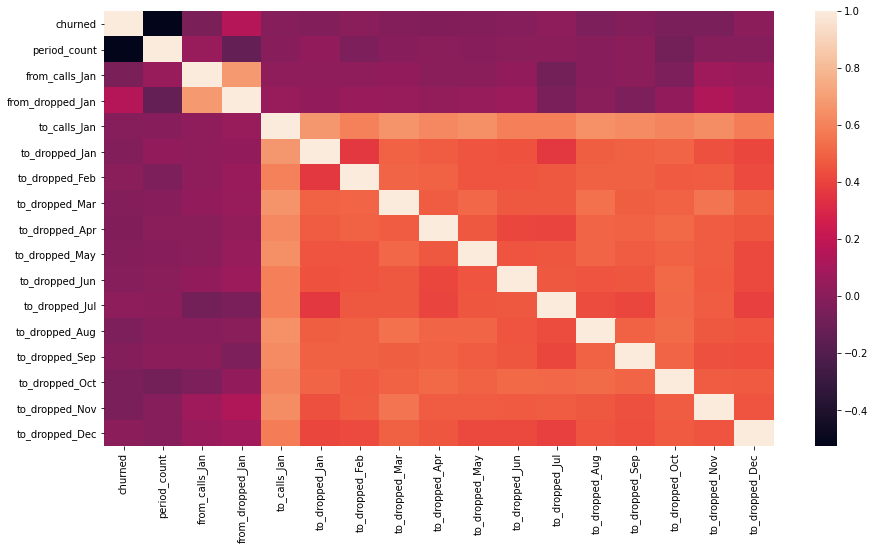

In [17]:
# create correlation matrix
corr = new_df.corr()

# plot the heatmap of the correlation matrix
plt.figure(figsize=(15,8))
sns.heatmap(corr)

You can see that none of these featurs are **too** highly correlated

**Look at churners vs non-churners**

In [18]:
# separate churners from non-churners
churners = new_df[new_df['churned']==1]
non_churners = new_df[new_df['churned']==0]

In [19]:
print("Number of churners: " + str(churners.shape[0]))

Number of churners: 243


In [20]:
print("Number of non-churners: " + str(non_churners.shape[0]))

Number of non-churners: 451


**Create validation set (train/test (validation) split)**

This would be used later for modeling. However, there will not be any modeling included in this notebook. This split is included here just for purposes of understanding a ML modeling flow.

In [23]:
# split the data into separate sets:
# one that will be used for training the model
# one that will be used for validating (testing) the mode
train_set, val_set = train_test_split(new_df, test_size=0.1, random_state = 0)

<IPython.core.display.Javascript object>

**Features to consider**

At this stage, we would usually encode those features that are categorical, and we would do it separately for the validation set.

In [24]:
# drop the features that we will be predicting from the training feature list
train_features = train_set.drop(['customer_id','churned'], axis = 1)

In [25]:
# list the features that will be used for training the model
list_feat_train = list(train_features)
for c in list_feat_train:
    print(c, train_features[c].dtype)

period_count int64
from_calls_Jan float64
from_dropped_Jan float64
to_calls_Jan float64
to_dropped_Jan float64
to_dropped_Feb float64
to_dropped_Mar float64
to_dropped_Apr float64
to_dropped_May float64
to_dropped_Jun float64
to_dropped_Jul float64
to_dropped_Aug float64
to_dropped_Sep float64
to_dropped_Oct float64
to_dropped_Nov float64
to_dropped_Dec float64


In [26]:
# drop the features that we will be predicting from the testing feature list
val_features = val_set.drop(['customer_id','churned'], axis = 1)

**Note: Since all values are floats, there is no need for encoding. If the values included non-numerical data types (categorical: character, string), then we would use some encoding methods.**

**Next step would be to scale/normalize the data so that the continuous features become in terms of the range to help with ML modeling** 